# COMP 551 Mini Project #1: Machine Learning 101

In [1]:
import json
import project_utilities as utils
from project_utilities import pd, np

import seaborn as sns
import matplotlib.pyplot as plt

with open('proj1_data.json') as fp:
    data = json.load(fp)

## Task 1: Construct the Dataset and Extract Features

In [2]:
X = utils.process_data(data)

### Split Data into Training, Validation, and Test Sets

In [3]:
X_train = X[0:10000]
X_validation = X[10000:11000]
X_test = X[11000:]

assert len(X_train) == 10000 , 'Expected 10000. Got %d' % len(X_train)
assert len(X_validation) == 1000 , 'Expected 1000. Got %d' % len(X_validation)
assert len(X_test) == 1000 , 'Expected 1000. Got %d' % len(X_test)

### Word Count Features

In [4]:
top_words_train = utils.get_top_words(X_train)
assert len(top_words_train) == 160, 'Expected 160. Got %d' % len(top_words_train)

X_train = utils.insert_top_words_count(X_train, top_words_train)
X_validation = utils.insert_top_words_count(X_validation, top_words_train)
X_test = utils.insert_top_words_count(X_test, top_words_train)

In [5]:
with open('words.txt', 'w') as fd:
    fd.write(' '.join(top_words_train))

### Convert to Pandas Dataframe for Ease of Handling

In [6]:
X_train = pd.DataFrame(X_train)
X_validation = pd.DataFrame(X_validation)
X_test = pd.DataFrame(X_test)

### New Features
New Feature #1: Children ^ 2<br>
New Feature #2: Children ^ 3<br>
__Note:__ The has_exclamation feature was included in the data processing step.

In [7]:
X_train['children_squared'] = X_train['children']**2
X_validation['children_squared'] = X_validation['children']**2
X_test['children_squared'] = X_test['children']**2

X_train['children_cubed'] = X_train['children']**3
X_validation['children_cubed'] = X_validation['children']**3
X_test['children_cubed'] = X_test['children']**3

In [8]:
X_train[['children_squared', 'children_cubed']].describe()

,children_squared,children_cubed
count,10000.000000,10000.000000
mean,1.960800,38.140000
std,34.018686,1215.634661
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1849.000000,79507.000000


In [ ]:
nb_top_corr = 10
cols = X_train.corr().nlargest(nb_top_corr, 'popularity_score')['popularity_score'].index
cm = np.corrcoef(X_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

## Task 2: Implement Linear Regression

A bias must be included. We will also run experiments to predict the popularity score of reddit comments. Therefore, we have remove that feature from our dataset as well.

In [9]:
X_train['bias'] = pd.Series(np.ones(X_train.shape[0]), index=X_train.index)
X_validation['bias'] = pd.Series(np.ones(X_validation.shape[0]), index=X_validation.index)
X_test['bias'] = pd.Series(np.ones(X_test.shape[0]), index=X_test.index)

y_train = X_train['popularity_score']
y_validation = X_validation['popularity_score']
y_test = X_test['popularity_score']

X_train.drop(columns=['text', 'popularity_score'], inplace=True)
X_validation.drop(columns=['text', 'popularity_score'], inplace=True)
X_test.drop(columns=['text', 'popularity_score'], inplace=True)

### 1. Using the Closed Form Solution

In [10]:
utils.LinearRegressionModel().fit_closed_form(X_train.values, y_train.values);

Time Elapsed: 0.012966 seconds


### 2. Using Gradient Descent

In [11]:
utils.LinearRegressionModel().fit_gradient_descent(X_train.values, y_train.values, step_size=0.00000001, decay_factor=10, error_threshold=0.0001);

Time Elapsed: 0.005983 seconds


## Task 3: Run Experiments

### 1. Compare the runtime, stability, and performance of the closed-form linear regression and gradient descent approaches.
__Note:__ For this substask, the models will train and predict using the 3 simple features provided.

In [12]:
X_train_compare = X_train[['children', 'controversiality', 'is_root']]
X_validation_compare = X_validation[['children', 'controversiality', 'is_root']]

#### i) Closed Form Solution Runtime, Stability, and Performance

In [13]:
model_cf = utils.LinearRegressionModel().fit_closed_form(X_train_compare.values, y_train.values)

print('MSE: %f' % (utils.mse(y_validation.values, model_cf.predict(X_validation_compare.values))))

Time Elapsed: 0.000997 seconds
MSE: 1.416295


#### ii) Gradient Descent Runtime, Stability, and Performance

##### a. (Initial Step Size = 0.001, Decay Factor = 10, Error Threshold = 0.0001)

In [14]:
model_gd = utils.LinearRegressionModel().fit_gradient_descent(X_train_compare.values, y_train.values, step_size=0.001, decay_factor=10, error_threshold=0.0001)

print('MSE: %f' % (utils.mse(y_validation.values, model_gd.predict(X_validation_compare.values))))

Time Elapsed: 0.007978 seconds
MSE: 1.435591


##### b. (Initial Step Size = 0.00001, Decay Factor = 10, Error Threshold = 0.0001)

In [15]:
model_gradient_descent_1 = utils.LinearRegressionModel().fit_gradient_descent(X_train_compare.values, y_train.values, step_size=0.00001, decay_factor=10, error_threshold=0.0001)

print('MSE: %f' % (utils.mse(y_validation.values, model_gradient_descent_1.predict(X_validation_compare.values))))

Time Elapsed: 0.002948 seconds
MSE: 1.937220


##### c. (Initial Step Size = 0.001, Decay Factor = 5, Error Threshold = 0.0001)

In [16]:
model_gradient_descent_2 = utils.LinearRegressionModel().fit_gradient_descent(X_train_compare.values, y_train.values, step_size=0.001, decay_factor=5, error_threshold=0.0001)

print('MSE: %f' % (utils.mse(y_validation.values, model_gradient_descent_2.predict(X_validation_compare.values))))

Time Elapsed: 0.007953 seconds
MSE: 1.430775


##### d. (Initial Step Size = 0.001, Decay Factor = 10, Error Threshold = 0.000001)

In [18]:
model_gradient_descent_3 = utils.LinearRegressionModel().fit_gradient_descent(X_train_compare.values, y_train.values, step_size=0.001, decay_factor=10, error_threshold=0.000001)

print('MSE: %f' % (utils.mse(y_validation.values, model_gradient_descent_3.predict(X_validation_compare.values))))

Time Elapsed: 0.273824 seconds
MSE: 1.432335


##### e. (Initial Step Size = 0.001, Decay Factor = 5, Error Threshold = 0.000001)
This model is trained with a set of parameters that have previously demonstrated (in steps a to d) to lower MSE.

In [19]:
model_gradient_descent_4 = utils.LinearRegressionModel().fit_gradient_descent(X_train_compare.values, y_train.values, step_size=0.001, decay_factor=5, error_threshold=0.000001)

print('MSE: %f' % (utils.mse(y_validation.values, model_gradient_descent_4.predict(X_validation_compare.values))))

Time Elapsed: 0.421215 seconds
MSE: 1.426481


As we can see with the experimentations in steps *a* through *e*, out of all the gradient descent models, the one with the following parameters: Initial Step Size = 0.001, Decay Factor = 5, and Error Threshold = 0.000001 had the best performance. It had an MSE of 1.426481. However, it also had the longest training time.

### 2. Comparison of Models with No Text Features, Top 60 Words, and Full 160 Word Occurrence Features

For the following experiments, we will be using the closed-form approach, due to it's fastest runtime and highest performance as demonstrated in the previous section.

In [21]:
columns = ['children', 'controversiality', 'is_root']
for i in range(1, 61):
    columns.append('top_word_' + str(i).zfill(3))

X_train_60 = X_train[columns]
X_validation_60 = X_validation[columns]

In [23]:
X_train_160 = X_train.drop(columns=['children_squared', 'children_cubed'])
X_validation_160 = X_validation.drop(columns=['children_squared', 'children_cubed'])

#### i) No Text Features

In [25]:
model_cf = utils.LinearRegressionModel().fit_closed_form(X_train_compare.values, y_train.values)
print('MSE: %f' % (utils.mse(y_validation.values, model_cf.predict(X_validation_compare.values))))

Time Elapsed: 0.000997 seconds
MSE: 1.416295


#### ii) Top-60-Words

In [26]:
model_cf_top_60 = utils.LinearRegressionModel().fit_closed_form(X_train_60.values, y_train.values)
print('MSE: %f' % (utils.mse(y_validation.values, model_cf_top_60.predict(X_validation_60.values))))

Time Elapsed: 0.028887 seconds
MSE: 1.355151


#### iii) Top-160-Words

In [28]:
model_cf_top_160 = utils.LinearRegressionModel().fit_closed_form(X_train_160.values, y_train.values)

mse_top_160 = utils.mse(y_validation.values, model_cf_top_160.predict(X_validation_160.values))

print('MSE: %f' % mse_top_160)

Time Elapsed: 0.004927 seconds
MSE: 0.989536


### 3. Demonstrate the Two New Features Improve Performance on the Validation Set

#### i) New Feature #1: Children Squared

In [30]:
X_train_feature_1 = X_train.drop(columns=['children_cubed'])
X_validation_feature_1 = X_validation.drop(columns=['children_cubed'])

In [35]:
model_cf_feature_1 = utils.LinearRegressionModel().fit_closed_form(X_train_feature_1.values, y_train.values)

mse_feature_1 = utils.mse(y_validation.values, model_cf_feature_1.predict(X_validation_feature_1.values))

print('MSE: %f' % mse_feature_1)
print('Improvement in MSE of: %f' % (mse_top_160 - mse_feature_1))

Time Elapsed: 0.004986 seconds
MSE: 0.967395
Improvement in MSE of: 0.022141


#### ii) New Feature #2: Children Cubed

In [33]:
X_train_feature_2 = X_train.drop(columns=['children_squared'])
X_validation_feature_2 = X_validation.drop(columns=['children_squared'])

In [36]:
model_cf_feature_2 = utils.LinearRegressionModel().fit_closed_form(X_train_feature_2.values, y_train.values)

mse_feature_2 = utils.mse(y_validation.values, model_cf_feature_2.predict(X_validation_feature_2.values))

print('MSE: %f' % mse_feature_2)
print('Improvement in MSE of: %f' % (mse_top_160 - mse_feature_2))

Time Elapsed: 0.004988 seconds
MSE: 0.967954
Improvement in MSE of: 0.021582


#### iii) Using Both Features

In [38]:
model_cf_both_features = utils.LinearRegressionModel().fit_closed_form(X_train.values, y_train.values)

mse_both_features = utils.mse(y_validation.values, model_cf_both_features.predict(X_validation.values))

print('MSE: %f' % mse_both_features)
print('Improvement in MSE of: %f' % (mse_top_160 - mse_both_features))

Time Elapsed: 0.005984 seconds
MSE: 0.967704
Improvement in MSE of: 0.021832


We can conclude that the best performing model is the one using the top 160 words with the first new feature: children squared. The model has an MSE of 0.967395

### 4. Run Your Best Model on the Test Set

In [44]:
y_predictions = model_cf_feature_1.predict(X_test.drop(columns=['children_cubed']).values)

print('MSE: %f' % (utils.mse(y_test, y_predictions)))

MSE: 1.292811


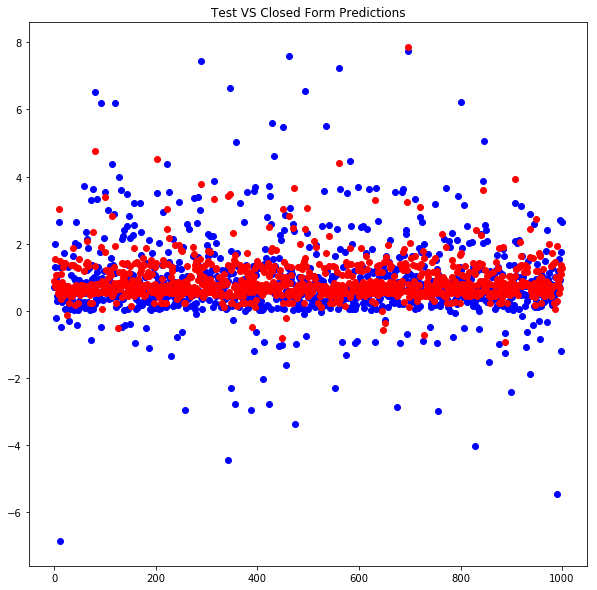

In [45]:
plt.figure(figsize=(10,10))
plt.plot(y_test, "bo", y_predictions, 'ro')
plt.title('Test VS Closed Form Predictions')
plt.show()